# DNN for RFM Analysis

## Feature Engineering

We'll bring back the data wrangling from the previous section, but now with several additional features this time.

We need several new columns to create a pattern through ML modelling. We'll refer to [CLV Prediction by Google Cloud](https://cloud.google.com/ai-platform/docs/clv-prediction-with-offline-training-train?hl=en), where the columns consist of:

### Main Features:
* `recency` : Time between the first and last orders,
* `frequency` : Number of orders placed by a customer,
* `T` : Time between first placed order to the end of features period,
* `monetary_value` : Sum of revenue in all orders of a customer,
------
* `total_quantity` : Total quantity in all transactions (excluding discounts)
* `total_returns` : The number of returns of transaction for a period of time

### Additional Features for ML Modelling:

* Separate timestamps: `date`, `time`, `hour`, `weekend`, `dayofweek`,
* `time_between` : Average time between orders during the period,
* `avg_basket_value` : Average monetary value per number of items,
* `avg_basket_size` : Average items per quantity in total transactions,

### Target Features

Since we're looking for customer behavior, we'll know that not every customer will return to buy on a given period. We'll use two target features:

* `is_returned` : Indication that tells if the user will come to store in the test period. 
* `target_monetary` : The total amount spent by a customer, including the training and target periods.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('online_retail_II_cleaned.csv')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
820417,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
820418,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
820419,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
820420,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [4]:
df.loc[df['Invoice'].str.startswith('C'), :][:20]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
175,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
176,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.90
177,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.00
178,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.60
179,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
180,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321,Australia,-15.00
181,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321,Australia,-15.00
182,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321,Australia,-20.40
183,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
193,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592,United Kingdom,-12.75


In [5]:
# Storage optimization, created in Section 1:

df['Country'] = df['Country'].astype('category')

df['Customer ID'] = df['Customer ID'].astype(int)

# df['Price'] = pd.to_numeric(df['Price'], downcast='float')

# df['Quantity'] = pd.to_numeric(df['Quantity'], downcast='integer')

In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
820417,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
820418,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
820419,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
820420,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [7]:
df.loc[df['revenue'] < 0, :].sort_values('revenue')[:20]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
670120,C567527,23113,PANTRY CHOPPING BOARD,-756,2011-09-21 09:16:00,5.06,17450,United Kingdom,-3825.36
67346,C498151,85220,SMALL FAIRY CAKE FRIDGE MAGNETS,-2504,2010-02-17 10:37:00,1.45,13902,Denmark,-3630.80
334722,C529352,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-1152,2010-10-28 09:32:00,2.75,17450,United Kingdom,-3168.00
208359,C515299,84078A,SET/4 WHITE RETRO STORAGE CUBES,-85,2010-07-09 15:26:00,34.95,13734,United Kingdom,-2970.75
646334,C565044,22191,IVORY DINER WALL CLOCK,-318,2011-08-31 17:02:00,7.65,12931,United Kingdom,-2432.70
519295,C549452,D,Discount,-1,2011-04-08 14:17:00,1867.86,17940,United Kingdom,-1867.86
703923,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.55,16029,United Kingdom,-1836.00
151828,C508455,79341,WILLOW BRANCH LIGHTS.,-312,2010-05-14 16:38:00,5.45,16077,United Kingdom,-1700.40
703917,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.30,16029,United Kingdom,-1656.00
284278,C524235,85184D,S/4 BLUE ROUND DECOUPAGE BOXES,-3936,2010-09-28 11:02:00,0.42,14277,France,-1653.12


In [8]:
df.loc[df['Customer ID'] == 17450, :].sort_values('revenue')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
670120,C567527,23113,PANTRY CHOPPING BOARD,-756,2011-09-21 09:16:00,5.06,17450,United Kingdom,-3825.36
334722,C529352,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-1152,2010-10-28 09:32:00,2.75,17450,United Kingdom,-3168.00
683805,C568832,23113,PANTRY CHOPPING BOARD,-186,2011-09-29 11:35:00,5.15,17450,United Kingdom,-957.90
334726,C529352,22804,CANDLEHOLDER PINK HANGING HEART,-320,2010-10-28 09:32:00,2.55,17450,United Kingdom,-816.00
334724,C529352,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-320,2010-10-28 09:32:00,2.55,17450,United Kingdom,-816.00
...,...,...,...,...,...,...,...,...,...
668960,567423,23113,PANTRY CHOPPING BOARD,756,2011-09-20 11:05:00,5.06,17450,United Kingdom,3825.36
283643,524181,21624,VINTAGE UNION JACK DOORSTOP,648,2010-09-27 16:59:00,5.96,17450,United Kingdom,3862.08
448660,540689,22470,HEART OF WICKER LARGE,1284,2011-01-11 08:43:00,3.21,17450,United Kingdom,4121.64
283641,524181,21622,VINTAGE UNION JACK CUSHION COVER,648,2010-09-27 16:59:00,6.89,17450,United Kingdom,4464.72


In [9]:
df.dtypes

Invoice          object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
Price           float64
Customer ID       int32
Country        category
revenue         float64
dtype: object

To get our features and labels, we are using a whole year of transactions to determine `target_revenue`, the revenue for the next six months that our model will predict. 

We'll divide the data into two sections: 
* **Features period** to calculate the features of RFM value in a year, and 
* **Target period** to calculate the revenue for the next six months as things we'll predict.

In [10]:
# Set the read format in float numbers
pd.options.display.float_format = '{:.4f}'.format

# Cutting the dates for time features

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['date'] = pd.to_datetime(df['InvoiceDate'].dt.date)
df['time'] = df['InvoiceDate'].dt.time

df['hour'] = df['time'].apply(lambda x: x.hour)
df['weekend'] = df['date'].apply(lambda x: x.weekday() in [5, 6])
df['dayofweek'] = df['date'].apply(lambda x: x.dayofweek)

In [11]:
# df.loc[df['date'].month == 

In [12]:
freq_per_date = (df.groupby(
                        ['Customer ID', 'InvoiceDate'])
                        ['Customer ID'].size())
freq_per_date

Customer ID  InvoiceDate        
12346        2009-12-18 10:55:00     1
             2010-03-02 13:08:00     5
             2010-06-28 13:53:00    19
             2010-10-04 09:54:00     1
12347        2010-10-31 14:20:00    40
                                    ..
18287        2010-09-21 12:19:00     2
             2010-11-22 11:51:00     9
             2011-05-22 10:39:00    29
             2011-10-12 10:23:00    38
             2011-10-28 09:29:00     3
Name: Customer ID, Length: 43792, dtype: int64

In [13]:
## Recalling the function from previous section

### Some modification: 

## We'll modify the reset_index() to combine all the data later on

# and we're changing the datatypes of date inputs to datetime64[ns]
# so that we can add the date with 1 for target_start

from typing import Union

def get_rfm_features(
    df: pd.DataFrame, 
    feature_start: Union[str, pd.DatetimeIndex], 
      feature_end: Union[str, pd.DatetimeIndex], 
     target_start: Union[str, pd.DatetimeIndex], 
       target_end: Union[str, pd.DatetimeIndex]
):
    
    ## Separating the orders based on the date:
    df_features_period = df.loc[(df['date'] >= feature_start) &
                                (df['date'] <= feature_end)]
    
    print(f'''Taking RFM values for features: \n{feature_start} to {feature_end} -- {(
        pd.to_datetime(feature_end) - pd.to_datetime(feature_start)).days} days''')
    
    print(f'''to predict target revenue: \n{target_start} to {target_end} -- {(
        pd.to_datetime(target_end) - pd.to_datetime(target_start)).days} days''')
    
    ## Getting the features:
    features = df_features_period.groupby('Customer ID').agg(
            # new_column_name = ('agg_col', 'agg_func')
                      recency = ('date', lambda x: (pd.to_datetime(feature_end) - x.max()).days),
                    frequency = ('revenue', lambda x: x.loc[x > 0].count()),
                            T = ('date', lambda x: (x.max() - x.min()).days),
               monetary_value = ('revenue', 'sum'),
               total_quantity = ('Quantity', lambda x: x.loc[x > 0].sum()),
         purchase_hour_median = ('hour', lambda x: x.median()),
            purchase_hour_dow = ('dayofweek', lambda x: x.median()),
        purchase_weekend_prop = ('weekend', 'mean')
    ).reset_index()   
    
    # Adding another features that depends on two columns above or two groupings:
    features['avg_basket_value'] = features['monetary_value'] / features['frequency']
    features['avg_basket_size']  = features['total_quantity'] / features['frequency']
    
    ## There's data with `frequency == 0`, so we'll fill in the gaps.
    features      = features.replace([-np.inf, np.inf], np.nan)
    
    ## Make the target data:
    target_data = df.loc[(df['date'] >= target_start) &
                         (df['date'] <= target_end)]

    # Target feature 1: `is_returned`
    features['is_returned'] = np.where(
        features['Customer ID'].isin(target_data['Customer ID']), 1, 0
    )
    
    # Target feature 2: `target_rev`
    target_rev = (target_data.groupby('Customer ID')['revenue']
                      .sum().rename('target_rev').reset_index())
    
    features = features.merge(target_rev, how='left', on='Customer ID').fillna(0)
    
    return features

In [14]:
train = get_rfm_features(
    df, '2009-12-01', '2010-12-05', '2010-12-06', '2011-06-06')

Taking RFM values for features: 
2009-12-01 to 2010-12-05 -- 369 days
to predict target revenue: 
2010-12-06 to 2011-06-06 -- 182 days


In [15]:
train

,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
0,12346,62,25,-1,290,169.3600,25,-1,13.0000,0.0000,0.0000,6.7744,1.0000,0,0.0000
1,12347,35,40,0,0,611.5300,509,0,14.0000,6.0000,1.0000,15.2882,12.7250,1,2535.2200
2,12348,69,19,0,0,221.1600,372,0,14.0000,0.0000,0.0000,11.6400,19.5789,1,1167.2400
3,12349,38,100,-5,328,2196.9900,991,-5,8.0000,3.0000,0.0000,21.9699,9.9100,0,0.0000
4,12351,6,21,0,0,300.9300,261,0,15.0000,0.0000,0.0000,14.3300,12.4286,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,18283,13,230,0,276,641.7700,336,0,13.0000,3.0000,0.2652,2.7903,1.4609,1,533.1000
4292,18284,62,27,0,0,411.6800,493,0,11.0000,0.0000,0.0000,15.2474,18.2593,0,0.0000
4293,18285,291,11,0,0,377.0000,144,0,10.0000,2.0000,0.0000,34.2727,13.0909,0,0.0000
4294,18286,107,66,-3,247,1138.4300,607,-16,11.0000,4.0000,0.0000,17.2489,9.1970,0,0.0000


In [16]:
train.sort_values(['monetary_value', 'Customer ID'], ascending=False)

,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
4170,18102,20,609,-7,349,317522.9200,117521,-1227,13.0000,1.0000,0.0308,521.3841,192.9737,1,92476.7200
1621,14646,5,1759,-30,363,243250.0500,170228,-1831,12.0000,2.0000,0.0285,138.2888,96.7754,1,115577.9200
1255,14156,2,2620,-57,367,184735.6400,109624,-1217,13.0000,2.0000,0.0870,70.5098,41.8412,1,41839.4000
1823,14911,2,5511,-124,367,134091.2300,69813,-3145,12.0000,2.0000,0.0919,24.3316,12.6679,1,32460.9800
925,13694,4,963,-16,362,129014.5400,126897,-2254,12.0000,2.0000,0.0347,133.9715,131.7726,1,25486.5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,15767,272,0,-9,94,-242.7000,0,-50,15.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000
2552,15935,362,0,-22,0,-308.8200,0,-286,17.0000,1.0000,0.0000,0.0000,0.0000,1,108.0400
1392,14337,362,0,-36,0,-658.6300,0,-393,14.0000,1.0000,0.0000,0.0000,0.0000,0,0.0000
1301,14213,2,5,-10,33,-1192.2000,244,-488,9.0000,4.0000,0.3333,-238.4400,48.8000,0,0.0000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train.loc[train['Customer ID'] == 14911]

,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
1823,14911,2,5511,-124,367,134091.2300,69813,-3145,12.0000,2.0000,0.0919,24.3316,12.6679,1,32460.9800


In [19]:
test = get_rfm_features(
    df, '2010-06-04', '2011-06-08', '2011-06-09', '2011-12-09')

Taking RFM values for features: 
2010-06-04 to 2011-06-08 -- 369 days
to predict target revenue: 
2011-06-09 to 2011-12-09 -- 183 days


In [20]:
test

,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
0,12346,247,19,-1,98,141.3100,19,-1,13.0000,0.0000,0.0000,7.4374,1.0000,0,0.0000
1,12347,62,155,0,158,3146.7500,1945,0,14.0000,2.0000,0.2581,20.3016,12.5484,1,2486.5700
2,12348,64,44,0,190,1388.4000,2488,0,14.0000,1.0000,0.0000,31.5545,56.5455,1,270.0000
3,12349,223,54,0,0,1152.6200,518,0,8.0000,3.0000,0.0000,21.3448,9.5926,1,1457.5500
4,12350,126,16,0,0,294.4000,196,0,16.0000,2.0000,0.0000,18.4000,12.2500,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,18280,93,30,-2,117,472.4500,194,-2,15.0000,2.0000,0.0000,15.7483,6.4667,0,0.0000
4362,18283,16,329,0,277,820.4500,498,0,14.0000,3.0000,0.1368,2.4938,1.5137,1,1555.8300
4363,18284,247,27,0,0,411.6800,493,0,11.0000,0.0000,0.0000,15.2474,18.2593,0,0.0000
4364,18286,292,50,-3,57,725.4800,494,-16,11.0000,4.0000,0.0000,14.5096,9.8800,0,0.0000


In [21]:
train.loc[train['target_rev'] == 0]

,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
0,12346,62,25,-1,290,169.3600,25,-1,13.0000,0.0000,0.0000,6.7744,1.0000,0,0.0000
3,12349,38,100,-5,328,2196.9900,991,-5,8.0000,3.0000,0.0000,21.9699,9.9100,0,0.0000
4,12351,6,21,0,0,300.9300,261,0,15.0000,0.0000,0.0000,14.3300,12.4286,0,0.0000
9,12357,19,164,0,0,11229.9900,3878,0,10.0000,1.0000,0.0000,68.4755,23.6463,0,0.0000
10,12358,6,57,0,356,2519.0100,826,0,10.0000,0.0000,0.0000,44.1932,14.4912,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,18279,150,13,0,0,231.3400,630,0,14.0000,3.0000,0.0000,17.7954,48.4615,0,0.0000
4290,18281,208,10,0,0,120.3200,92,0,10.0000,1.0000,0.0000,12.0320,9.2000,0,0.0000
4292,18284,62,27,0,0,411.6800,493,0,11.0000,0.0000,0.0000,15.2474,18.2593,0,0.0000
4293,18285,291,11,0,0,377.0000,144,0,10.0000,2.0000,0.0000,34.2727,13.0909,0,0.0000


## Data Wrangling into Periods for ML & DL Prediction

Here we will accumulate all the data, with `rfm_period` as an identifier. The data is specified below:

* `rfm_period == 0` means the data's taken on a whole six month (`2009-12-01` to `2010-05-31`, and also the target revenue's calculated within the next two months (`2010-06-01` to `2010-08-01`)

* As the `rfm_period` increases, the time will shift every two months, so the RFM value will renew; either from a new transaction or not returning.

    * Take `rfm_period == 1`with
        * training data of `2010-02-01` to `2010-07-31` and 
        * target revenue calculated from `2010-08-01` to `2011-10-01`,
    * Move on to `rfm_period == 2` with 
        * training data of `2010-04-01` to `2010-09-30` and 
        * target revenue calculated from `2010-10-01` to `2010-12-01`,
    * and so on until it reaches the end of transaction in `2011-12-09`.

In [22]:
periods  = ['2009-12-01', '2010-02-01', '2010-04-01', '2010-06-01', 
            '2010-08-01', '2010-10-01', '2010-12-01', '2011-02-01', 
            '2011-04-01', '2011-06-01', '2011-08-01', '2011-10-01', '2011-12-09']
            ## Last date (09 instead of 01) being last day of transaction. 
    
def accumulate_data(df, periods):
    
    periods = pd.to_datetime(periods, format='%Y-%m-%d')

    total_data = pd.DataFrame()
    
    for i, date in zip(range(8), periods):
        
        rfm_features = get_rfm_features(df, 
            periods[i]  , periods[i+3] - pd.Timedelta(days=1), 
            periods[i+3], periods[i+4])
        rfm_features['rfm_period'] = i
        
        total_data = pd.concat([total_data, rfm_features], ignore_index=True, sort=False)

    # Adjust the column positions: `rfm_period`, features, label
    total_data = total_data[ ['rfm_period'] + 
        [col for col in total_data.columns if col != 'rfm_period'] ]
        
    return total_data

In [23]:
whole_data = accumulate_data(df, periods)

Taking RFM values for features: 
2009-12-01 00:00:00 to 2010-05-31 00:00:00 -- 181 days
to predict target revenue: 
2010-06-01 00:00:00 to 2010-08-01 00:00:00 -- 61 days
Taking RFM values for features: 
2010-02-01 00:00:00 to 2010-07-31 00:00:00 -- 180 days
to predict target revenue: 
2010-08-01 00:00:00 to 2010-10-01 00:00:00 -- 61 days
Taking RFM values for features: 
2010-04-01 00:00:00 to 2010-09-30 00:00:00 -- 182 days
to predict target revenue: 
2010-10-01 00:00:00 to 2010-12-01 00:00:00 -- 61 days
Taking RFM values for features: 
2010-06-01 00:00:00 to 2010-11-30 00:00:00 -- 182 days
to predict target revenue: 
2010-12-01 00:00:00 to 2011-02-01 00:00:00 -- 62 days
Taking RFM values for features: 
2010-08-01 00:00:00 to 2011-01-31 00:00:00 -- 183 days
to predict target revenue: 
2011-02-01 00:00:00 to 2011-04-01 00:00:00 -- 59 days
Taking RFM values for features: 
2010-10-01 00:00:00 to 2011-03-31 00:00:00 -- 181 days
to predict target revenue: 
2011-04-01 00:00:00 to 2011-06-01 

In [24]:
whole_data

,rfm_period,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
0,0,12346,90,6,0,74,28.0500,6,0,13.0000,1.0000,0.0000,4.6750,1.0000,1,142.3100
1,0,12349,32,46,-5,146,1044.3700,473,-5,13.0000,3.0000,0.0000,22.7037,10.2826,0,0.0000
2,0,12355,10,22,0,0,488.2100,303,0,11.0000,4.0000,0.0000,22.1914,13.7727,0,0.0000
3,0,12358,174,17,0,0,1429.8300,309,0,7.0000,1.0000,0.0000,84.1076,18.1765,1,268.1000
4,0,12359,49,66,-4,128,1428.2300,777,-216,13.0000,2.0000,0.4571,21.6398,11.7727,1,489.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24336,7,18273,126,1,0,0,51.0000,20,0,11.0000,6.0000,1.0000,51.0000,20.0000,1,102.0000
24337,7,18280,146,10,0,0,180.6000,45,0,9.0000,0.0000,0.0000,18.0600,4.5000,0,0.0000
24338,7,18281,49,7,0,0,80.8200,54,0,10.0000,6.0000,1.0000,11.5457,7.7143,0,0.0000
24339,7,18283,17,297,0,136,768.8200,518,0,13.0000,3.0000,0.0000,2.5886,1.7441,1,130.9000


In [25]:
## Checking 2 samples of Customer ID
whole_data.loc[whole_data['Customer ID'] == 18102]

,rfm_period,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
2648,0,18102,10,387,-3,171,152823.8500,64795,-622,13.0000,1.0000,0.0051,394.8937,167.4289,1,88660.5300
5487,1,18102,1,347,-5,175,139939.3400,61693,-902,13.0000,1.0000,0.0057,403.2834,177.7896,1,46354.3900
8439,2,18102,14,307,-3,157,142801.7200,56767,-604,12.0000,1.0000,0.0516,465.1522,184.9088,1,51668.1500
11947,3,18102,15,222,-4,160,164699.0700,52726,-605,12.5000,2.0000,0.0752,741.8877,237.5045,1,55669.2200
15350,4,18102,53,159,-2,130,153691.7600,38198,-325,13.0000,1.0000,0.1056,966.6148,240.2390,1,17444.8000
18698,5,18102,6,89,-1,162,124782.1700,27695,-1,14.0000,1.0000,0.0111,1402.0469,311.1798,1,19362.7000
21458,6,18102,14,96,0,161,92476.7200,21790,0,14.0000,1.0000,0.0000,963.2992,226.9792,1,64909.2000
24250,7,18102,3,134,0,171,101716.7000,22810,0,11.0000,1.0000,0.0000,759.0799,170.2239,1,50608.1000


In [26]:
whole_data.loc[whole_data['Customer ID'] == 14156]

,rfm_period,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
808,0,14156,10,1302,-25,171,101171.9700,61146,-722,13.0000,3.0000,0.1040,77.7050,46.9631,1,32150.2600
3580,1,14156,6,1099,-30,168,74213.0100,45299,-614,13.0000,3.0000,0.1337,67.5278,41.2184,1,28627.6000
6458,2,14156,0,1240,-30,176,82681.2600,48601,-591,13.0000,2.0000,0.0953,66.6784,39.1944,1,22156.4100
9577,3,14156,4,1312,-28,176,82934.2700,45382,-491,12.0000,1.0000,0.0709,63.2121,34.5899,1,17404.1200
13044,4,14156,17,1059,-18,161,68188.1300,37571,-146,12.0000,1.0000,0.0761,64.3892,35.4778,1,15796.2000
16436,5,14156,14,995,-18,165,55356.7300,27675,-744,13.0000,1.0000,0.0553,55.6349,27.8141,1,8310.3600
19625,6,14156,15,516,-11,165,41510.6800,21757,-677,13.0000,1.0000,0.0455,80.4471,42.1647,1,36072.7800
22410,7,14156,0,748,-7,178,60179.3400,30541,-673,13.0000,1.0000,0.0570,80.4537,40.8302,1,24300.4100


In [27]:
whole_data.describe().T

,count,mean,std,min,25%,50%,75%,max
rfm_period,24341.0000,3.5227,2.2075,0.0000,2.0000,4.0000,5.0000,7.0000
Customer ID,24341.0000,15324.1009,1700.2936,12346.0000,13861.0000,15303.0000,16797.0000,18287.0000
recency,24341.0000,63.6779,51.8604,0.0000,18.0000,52.0000,103.0000,183.0000
frequency,24341.0000,61.4619,114.9094,0.0000,15.0000,32.0000,69.0000,3304.0000
returns_count,24341.0000,-1.4208,4.5445,-113.0000,-1.0000,0.0000,0.0000,0.0000
T,24341.0000,52.3596,60.0054,0.0000,0.0000,21.0000,106.0000,183.0000
monetary_value,24341.0000,1281.1492,4598.8456,-2904.8300,252.8400,516.1300,1128.1500,164699.0700
total_quantity,24341.0000,814.2763,3613.6183,0.0000,129.0000,292.0000,675.0000,220596.0000
total_return,24341.0000,-29.1304,1006.0502,-87167.0000,-2.0000,0.0000,0.0000,0.0000
purchase_hour_median,24341.0000,12.6307,2.2192,7.0000,11.0000,13.0000,14.0000,20.0000


In [28]:
whole_data.loc[whole_data['monetary_value'] < 0, :]

,rfm_period,Customer ID,recency,frequency,returns_count,T,monetary_value,total_quantity,total_return,purchase_hour_median,purchase_hour_dow,purchase_weekend_prop,avg_basket_value,avg_basket_size,is_returned,target_rev
31,0,12424,174,0,-4,1,-24.7500,0,-7,11.5000,0.5000,0.0000,0.0000,0.0000,1,421.0400
85,0,12590,49,0,-1,0,-2.9500,0,-1,7.0000,0.0000,0.0000,0.0000,0.0000,1,-4.9500
127,0,12705,179,0,-3,0,-41.5000,0,-10,10.0000,3.0000,0.0000,0.0000,0.0000,1,1544.8700
142,0,12746,174,0,-2,0,-11.9000,0,-2,17.0000,1.0000,0.0000,0.0000,0.0000,1,242.7500
145,0,12755,77,24,-27,103,-208.7500,68,-259,10.0000,1.0000,0.0000,-8.6979,2.8333,1,617.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,7,17621,60,0,-1,0,-43.8000,0,-4,15.0000,2.0000,0.0000,0.0000,0.0000,0,0.0000
24122,7,17820,60,0,-2,0,-7.1000,0,-2,15.0000,2.0000,0.0000,0.0000,0.0000,0,0.0000
24133,7,17850,171,0,-15,0,-102.5800,0,-40,14.0000,3.0000,0.0000,0.0000,0.0000,0,0.0000
24183,7,17940,33,13,-2,138,-178.2800,8206,-2,9.0000,2.0000,0.0000,-13.7138,631.2308,1,237.0000


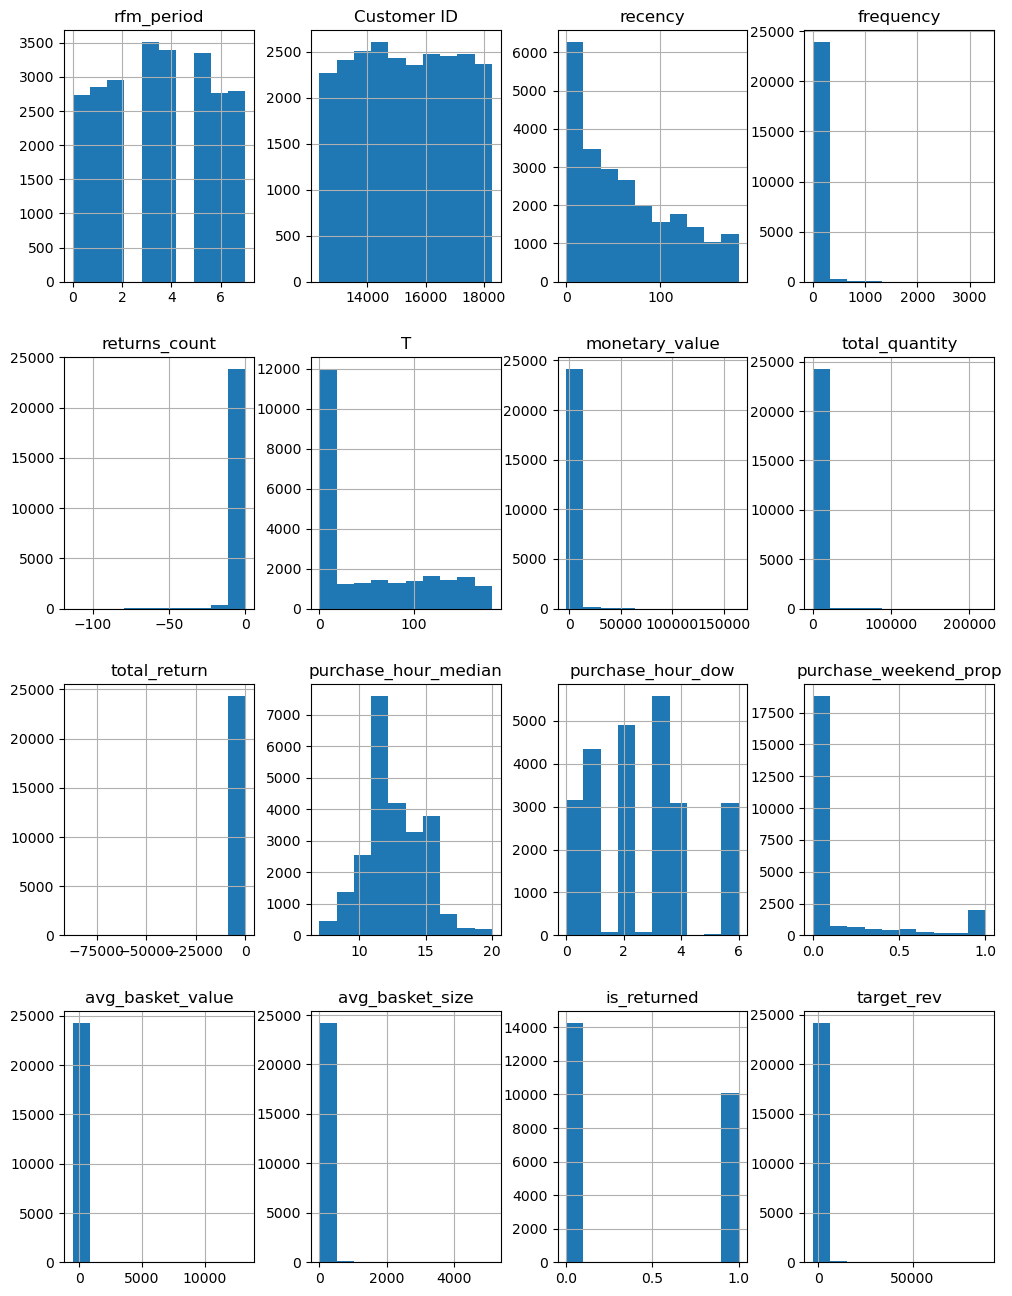

In [29]:
whole_data.hist(figsize=(12,16))
plt.show()

## Insights

As you can see, some of the columns are right-skewed and have a small amount of outliers. Several examples include `monetary_value`, `frequency`, and `total_quantity`. This oould make the model giving more importance to the outliers when predicting the data.

One way to make sure the model could predict optimally is by log-transforming the dataset to mask the weight of outlier in prediction. In fact, the author has tried the method on several skewed columns such as `monetary_value`, `avg_basket_value`, and `avg_basket_size`. However, the prediction results in a negative accuracy for regression, while the author aims to include regression to the plate. Here are some teaser for all three models prediction:

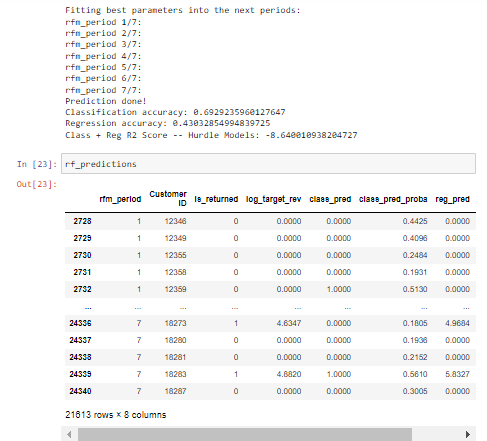

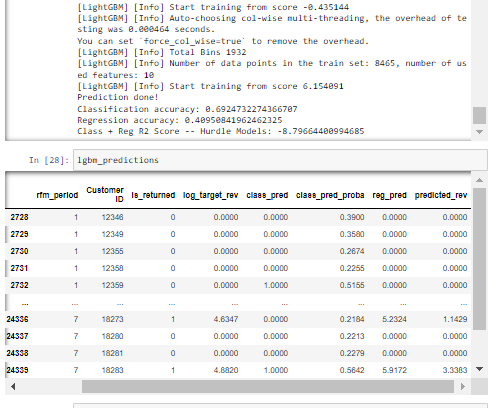

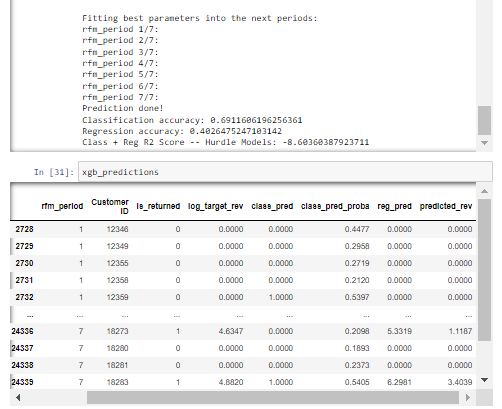

With this in mind, the author proceeds to put this dataset for the prediction on the next session.